In [1]:
#Este codigo resolve o conjunto de EDOs do modelo SIRV (vacina) pelo metodo
#de Runge-Kutta de 4 ordem.
#Andre Nepomuceno (junho/2020)

In [2]:
#Modelo SIR
#dS/dt = -beta*S*I - vS = f_R(S,I,t)
#dI/dt =  beta*S*I - gama*I = f_I(S,I,t)
#dR/dt = gama*I = f_R(S,I,t)

In [5]:
 %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 

In [6]:
#Vamos definir o intervalo de tempo e tamanho da populacao
N = 100000  #populacao
t_init = 0
t_final = 120 
nsteps = 1200 
h = (t_final-t_init)/nsteps
func = np.zeros(3) #array para guardar os valores de f_S,f_I e f_R
norm = 1e4   #normalizacao para o plot


In [7]:
#Aqui definimos uma funcao para o calculo de f_S,f_I e f_R. 
#A funcao retorna o array 'func' com tres elementos
def F(S,I,beta,gama,v):
    func[0] = -beta*S*I -v*S       #f_S
    func[1] = beta*S*I - gama*I    #f_I
    func[2] = gama*I               #f_R
    return func

In [8]:
#Aqui implementamos o metodo de Runge-Kutta 

def rk4_sir(beta,gama,v,S0,I0,R0):
    #Valores iniciais
    S = S0
    I = I0
    R = R0
    r0 = beta/gama*S0
    #Vamos definir tres listas vazias, Spoints,Ipoints,Rpoints, para guardar os valores
    #de S(t),I(t) e R(t) em cada iteracao. Ao final, essas lista serão transformadas em Numpy arrays.
    Spoints = []
    Ipoints = []
    Rpoints = []
    for t in np.arange(t_init,t_final+h,h): #nsteps+1 pontos, de zero a t_final
        Spoints.append(S)
        Ipoints.append(I)
        Rpoints.append(R)
        s1 = h*F(S,I,beta,gama,v)[0]   #retorna h*f_S
        i1 = h*F(S,I,beta,gama,v)[1]   #retorna h*f_I
        r1 = h*F(S,I,beta,gama,v)[2]   #retorna h*f_R
        s2 = h*F(S+0.5*s1,I+0.5*i1,beta,gama,v)[0]
        i2 = h*F(S+0.5*s1,I+0.5*i1,beta,gama,v)[1]
        r2 = h*F(S+0.5*s1,I+0.5*i1,beta,gama,v)[2]
        s3 = h*F(S+0.5*s2,I+0.5*i2,beta,gama,v)[0]
        i3 = h*F(S+0.5*s2,I+0.5*i2,beta,gama,v)[1]
        r3 = h*F(S+0.5*s2,I+0.5*i2,beta,gama,v)[2]
        s4 = h*F(S+s3,I+i3,beta,gama,v)[0]
        i4 = h*F(S+s3,I+i3,beta,gama,v)[1]
        r4 = h*F(S+s3,I+i3,beta,gama,v)[2]
        S+= (1/6.)*(s1+2*s2+2*s3+s4)      #S_(n+1) = S_n + (1/6)*(s1+2*s2+2*s3+s4)
        I+= (1/6.)*(i1+2*i2+2*i3+i4)
        R+= (1/6.)*(r1+2*r2+2*r3+r4)
    #Agora vamos transformar as listas em Numpy arrays para plotar a solucao
    Spoints = np.array(Spoints)
    Ipoints = np.array(Ipoints)
    Rpoints = np.array(Rpoints)
    return Spoints, Ipoints, Rpoints,r0

In [9]:
#Chama a funcao rk4_sir para resolver as EDOs
#simulacao para uma populacao de 100k habitantes
v1 = 0.0001
v2 = 0.01
S_func1,I_func1,R_func1,r0_1 = rk4_sir(0.5e-5,0.2,v1,N-2,2,0)
S_func2,I_func2,R_func2,r0_2 = rk4_sir(0.5e-5,0.2,v2,N-2,2,0)
time = np.linspace(t_init,t_final,nsteps+1)
r0_str1 = r'${:.1f}$'.format(r0_1)  #string para o plot
r0_str2 = r'${:.1f}$'.format(r0_2)
v1_str = r'${:.4f}$'.format(v1)
v2_str = r'${:.2f}$'.format(v2)
print(r0_str1)
#Verifique que I_final ~ 0
print("I_final1 = ",I_func1[nsteps] )
print("I_final2 = ",I_func2[nsteps] )
time.size == S_func2.size  #deve retornar true


$2.5$
I_final1 =  0.32564614750632115
I_final2 =  2.29129797235573


True

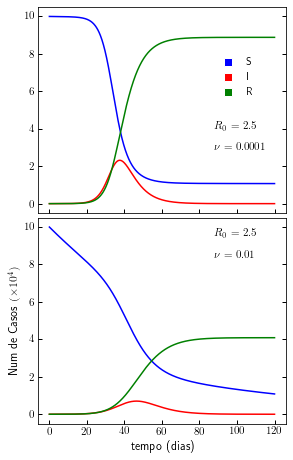

In [10]:
#A maior parte do codigo desta celula visa deixar o grafico apresentavel
plt.rc('text', usetex=True)  #latex style
fig = plt.figure(figsize=(4.3, 6.5))
ax1 = fig.add_axes([0.15, 0.53, 0.8, 0.44],xticklabels=[]) 
ax2 = fig.add_axes([0.15, 0.08, 0.8, 0.44])

ax1.tick_params(direction='in', length=4, width=1, grid_alpha=0.5,labelsize=11)
ax2.tick_params(direction='in', length=4, width=1, grid_alpha=0.5,labelsize=11)
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_xlabel("tempo (dias)",fontsize=12)
ax2.set_ylabel(r"Num de Casos $(\times 10^{4})$",fontsize=12)
ax1.plot(time,S_func1/norm,'b',label='S')
ax1.plot(time,I_func1/norm,'r',label='I')
ax1.plot(time,R_func1/norm,'g',label='R')
#ax1.legend(loc='upper right',bbox_to_anchor=(0.9, 0.8),frameon=False)
ax1.text(0.71,0.4,r'$R_{0}$ = '+r0_str1, transform=ax1.transAxes,fontsize=11)
ax1.text(0.71,0.3,r'$\nu$ = '+v1_str, transform=ax1.transAxes,fontsize=11)
ax2.plot(time,S_func2/norm,'b')
ax2.plot(time,I_func2/norm,'r')
ax2.plot(time,R_func2/norm,'g')
ax2.text(0.71,0.9,r'$R_{0}$ = '+r0_str2, transform=ax2.transAxes,fontsize=11)
ax2.text(0.71,0.8,r'$\nu$ = '+v2_str, transform=ax2.transAxes,fontsize=11)
#-------------------------------------------------------------
#Esta parte do codigo serve para fazer o marcador da legenda como quadrados, no lugar do padrao reta horizontal
line1 = Line2D(range(1), range(1), color="white", marker='s',markersize=8,markerfacecolor="b")
line2 = Line2D(range(1), range(1), color="white", marker='s',markersize=8,markerfacecolor="r")
line3 = Line2D(range(1), range(1), color="white", marker='s',markersize=8,markerfacecolor="g")
ax1.legend((line1,line2,line3),('S','I','R'),numpoints=1,loc='upper right',bbox_to_anchor=(0.9, 0.8),frameon=False)

In [11]:
#calcula razao de infectados para diferentes valores de r0 e nu
npoints = 50
beta_values = np.linspace(0.2,1,npoints)
v_values =  np.linspace(0.0001,0.01,npoints) 
X,Y = np.meshgrid(beta_values,v_values)
beta_values = X.flatten()
v_values = Y.flatten()
Z = []
for k in range(beta_values.size):
    _,_,R_func,_ = rk4_sir(beta_values[k]*1e-5,0.2,v_values[k],99998,2,0)
    Z.append(R_func[nsteps]/N)

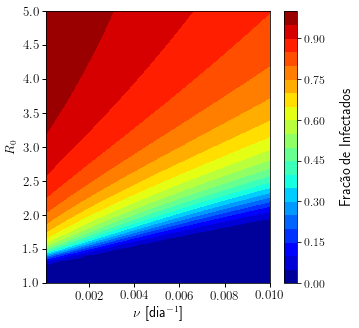

In [12]:
#plot 2D de R_0 versus v
beta_4plot = (5*beta_values).reshape(npoints,npoints)
v_values = v_values.reshape(npoints,npoints)
Z = np.array(Z).reshape(npoints,npoints)
fig = plt.figure("fig3",figsize=(5,5))
plt.tick_params(direction='out', length=4, width=1,labelsize=13)
plt.contourf(v_values, beta_4plot, Z, 20,cmap='jet')
plt.xlabel(r'$\nu$ [dia$^{-1}$]',fontsize=14)
plt.ylabel('$R_{0}$',fontsize=13)
#ax = plt.gcf()
cbar = plt.colorbar()
cbar.set_label(label='Fracão de Infectados',size=14,labelpad=15)
cbar.ax.tick_params(labelsize=12) 
plt.clim(0,1)

Text(0.5, 1.0, '$\\rho = 0.6$')

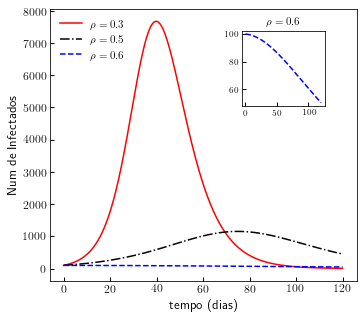

In [13]:
#A fracao critica rho_c do numero de individuos vacinados para nao ter epidemia eh 1- 1/R0. 
#Vamos simular para R_0 = 2.5, rho = 0.3, 0.5, 0.6, e para I(0) = 100
fig = plt.figure("fig4",figsize=(5.5,5))
ax_1 = plt.axes()
ax_2 = plt.axes([0.61, 0.61, 0.21, 0.21])
ax_1.tick_params(direction='in', length=4, width=1, grid_alpha=0.5,labelsize=12)
ax_2.tick_params(direction='in', length=4, width=1, grid_alpha=0.5,labelsize=9)
for rho,color,line in zip([0.3,0.5,0.6],['r','k','b'],['-','-.','--']):
    s_eff = N*(1-rho) - 100
    _,I_func,_,_ = rk4_sir(0.5e-5,0.2,0,s_eff,100,0)
    ax_1.plot(time, I_func,color=color,linestyle=line,label=r'$\rho = {:.1f}$'.format(rho))

ax_1.legend(loc='upper left',frameon=False,fontsize=11)
ax_1.set_xlabel("tempo (dias)",fontsize=13)
ax_1.set_ylabel("Num de Infectados",fontsize=13)
ax_2.plot(time,I_func,'b--')
ax_2.set_title(r'$\rho = 0.6$',fontsize=11)